<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


Submission - Version 1, Dated 31.01.2022

In this notebook, I tried to practice all the classification algorithms that I have learned in this course, by solving the todo instructions.

I loaded a dataset using Pandas library, and applied the following algorithms, and found the best one for this specific dataset by accuracy evaluation methods.

Let md first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2022-01-31 19:47:24--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2022-01-31 19:47:24 (91.7 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


### Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



#### Plottig the PaidOff/Collection status w.r.t. the Proncipal amount invested.

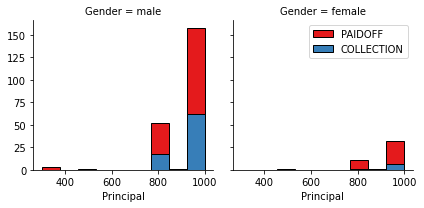

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

#### Plottig the PaidOff/Collection status w.r.t. the age of the investor.

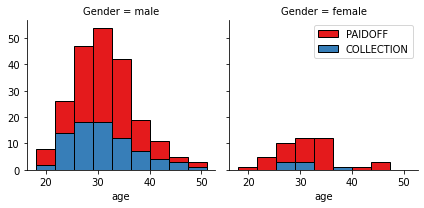

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


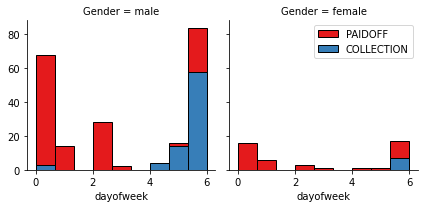

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]  # features selection as per prescribed statement of the problem, excluding redundant date features. 

Feature = pd.concat([Feature, pd.get_dummies(df['education'])], axis=1)  # converting 'education' values into seprate labels 
Feature.drop(['Master or Above'], axis = 1,inplace=True)                 # dropping it as have minimum impact as graphed above
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


### FInding the best 'k' value

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       ])

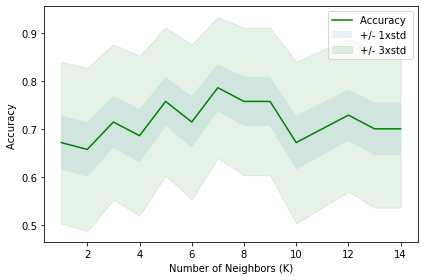

The best accuracy was with 0.7857142857142857 with k= 7


In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

best_k = mean_acc.argmax()+1
print( "The best accuracy was with", mean_acc.max(), "with k=", best_k) 

In [23]:
k = 7 # best_k as evaluated above
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn = neigh.predict(X_test)

# Evaluation on 'train/test' data obtained from train_test split of 'loan_train.csv' based dat
from sklearn import metrics
print("Train set Accuracy (for train_test splitted data): %.4f " % metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test  set Accuracy (for train_test splitted data): %.4f" % metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy (for train_test splitted data): 0.8080 
Test  set Accuracy (for train_test splitted data): 0.7857


# Decision Tree


In [24]:
from sklearn.tree import DecisionTreeClassifier

#  Finding best depth for the tree
Ts = 15
mean_acc = np.zeros((Ts-1))
std_acc = np.zeros((Ts-1))

for n in range(1,Ts):
    #Train Model and Predict  
    LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)   # best depth is 1 and 2.
    yhat = LoanTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.64285714,
       0.77142857, 0.75714286, 0.75714286, 0.65714286, 0.7       ,
       0.7       , 0.71428571, 0.7       , 0.72857143])

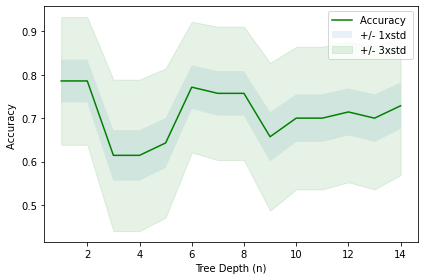

The best accuracy was with 0.7857142857142857 with depth= 1


In [25]:
plt.plot(range(1,Ts),mean_acc,'g')
plt.fill_between(range(1,Ts),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ts),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Tree Depth (n)')
plt.tight_layout()
plt.show()

best_depth = mean_acc.argmax()+1
print( "The best accuracy was with", mean_acc.max(), "with depth=", best_depth)

In [26]:
d = 1 # maximum depth by iteration as above
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = d).fit(X_train,y_train) # building model with depth=2
yhat_dtree = dtree.predict(X_test)

# Evaluation on 'train/test' data obtained from train_test split of 'loan_train.csv' based dat
from sklearn import metrics
print("Train set Accuracy (for train_test splitted data): %.4f " % metrics.accuracy_score(y_train, dtree.predict(X_train)))
print("Test  set Accuracy (for train_test splitted data): %.4f" % metrics.accuracy_score(y_test, yhat_dtree))

Train set Accuracy (for train_test splitted data): 0.7428 
Test  set Accuracy (for train_test splitted data): 0.7857


# Support Vector Machine


In [27]:
from sklearn import svm
from sklearn import metrics

#  Finding best model parameters by iterating
Sv = 15
mean_acc = np.zeros((Sv-1))
std_acc = np.zeros((Sv-1))

for n in range(1,Sv):
    #Train Model and Predict  
    clf_svm = svm.SVC(kernel='poly', class_weight='balanced', degree=n).fit(X_train, y_train)
    yhat = clf_svm.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.54285714, 0.52857143, 0.54285714, 0.57142857, 0.55714286,
       0.5       , 0.45714286, 0.37142857, 0.32857143, 0.31428571,
       0.28571429, 0.31428571, 0.28571429, 0.3       ])

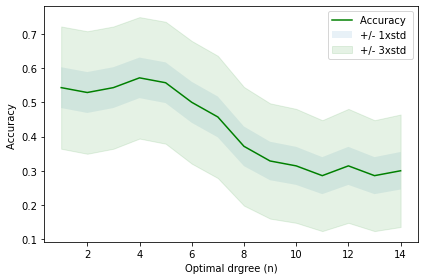

The best accuracy was with 0.5714285714285714 optimal degree= 4


In [28]:
plt.plot(range(1,Sv),mean_acc,'g')
plt.fill_between(range(1,Sv),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Sv),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Optimal drgree (n)')
plt.tight_layout()
plt.show()

optimal_deg = mean_acc.argmax()+1
print( "The best accuracy was with", mean_acc.max(), "optimal degree=", optimal_deg)

In [29]:
# final optimal model

deg = 4 # optimal_deg # evaluated best with iterations as found in above cells -- 'poly' parameter produced the best results, 
clf_svm = svm.SVC(kernel='poly', class_weight='balanced', degree=deg).fit(X_train, y_train)
#clf2 = svm.SVC(kernel='linear')

yhat_svm = clf_svm.predict(X_test)

# Evaluation on 'train/test' data obtained from train_test split of 'loan_train.csv' based dat
print("Train set Accuracy (for train_test splitted data): %.4f " % metrics.accuracy_score(y_train, clf_svm.predict(X_train)))
print("Test  set Accuracy (for train_test splitted data): %.4f" % metrics.accuracy_score(y_test, yhat_svm))

Train set Accuracy (for train_test splitted data): 0.7319 
Test  set Accuracy (for train_test splitted data): 0.5714


# Logistic Regression


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

LR = LogisticRegression(C=0.08, solver='sag').fit(X_train,y_train)     # iterating value of C and solver this produces improved accuracy with minimum logloss.
#LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)

In [31]:
yhat_lr = LR.predict(X_test)

# Evaluation on 'test' data obtained from train_test split of 'loan_train.csv' based data.

print("Train set Accuracy: %.4f " % metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test  set Accuracy: %.4f" % metrics.accuracy_score(y_test, yhat_lr))

#for logloss
LR_prob = LR.predict_proba(X_test)
print("Logistic Regression LogLoss: %.2f" % log_loss(y_test, LR_prob))

Train set Accuracy: 0.7391 
Test  set Accuracy: 0.7571
Logistic Regression LogLoss: 0.48


# Model Evaluation using Test set

In [32]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [33]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2022-01-31 19:47:48--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2022-01-31 19:47:49 (31.0 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation

In [34]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


### Feature pre-processing and normalization.

In [35]:
# convert to date_time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

# feature extraction / normalizing
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# keeping relevant features
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)

# Feature Selection
X_test = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
y_test = test_df['loan_status'].values

print ('Test set:', X_test.shape,  y_test.shape)
#test_df.isnull()

Test set: (54, 8) (54,)


### Evaluation of models on given 'Test' data.

In [36]:
yhat_knn = neigh.predict(X_test)
scores_knn = [jaccard_score(y_test, yhat_knn, pos_label='PAIDOFF'), f1_score(y_test, yhat_knn, average='weighted'), "NA"]

yhat_dtree = dtree.predict(X_test)
scores_dtree = [jaccard_score(y_test, yhat_dtree, pos_label='PAIDOFF'), f1_score(y_test, yhat_dtree, average='weighted'), "NA"]

yhat_svm = clf_svm.predict(X_test)
scores_svm = [jaccard_score(y_test, yhat_svm, pos_label='PAIDOFF'), f1_score(y_test, yhat_svm, average='weighted'), "NA"]

yhat_lr = LR.predict(X_test)
scores_lr = [jaccard_score(y_test, yhat_lr, pos_label='PAIDOFF'), f1_score(y_test, yhat_lr, average='weighted'), log_loss(y_test, LR.predict_proba(X_test))]

scores = [scores_knn, scores_dtree, scores_svm, scores_lr]
report = pd.DataFrame(scores, index=["KNN", "Decision Tree", "SVM", "LogisticRegression"], columns=["Jaccard", "F1-score", "LogLoss"]).rename_axis("Algorithm", axis=1)
#print(report)

# Report

In [37]:
pd.DataFrame(report)

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.653846,0.632840,NA
Decision Tree,0.740741,0.630418,NA
SVM,0.585366,0.703770,NA
LogisticRegression,0.754717,0.671764,0.473504




#### From the scores from different metrices, it is evident that (provided with moderate data), the classification prooblem like this one may best be predicted wih Logistic Regression or Decision Tree models. 

##### Thanks for reviewing my work.